In [1]:
import logging

from ArxivEquationScraping import *
from EquationFiltering import *
from PictureGenerator import *

#### - Scraping ArXiv for STEM-category papers:

In [2]:
nr_papers = 100
STEM_category = 'physics'
download_directory = "arxiv_papers/"
download_arxiv_papers(STEM_category, nr_papers, download_dir=download_directory)

======= Downloading: 100 (out of 1561) papers in category: 'physics' in YY/MM: 2303 =======


KeyboardInterrupt: 

#### - Extracting .tex files from papers and deleting other files:

In [3]:
unpack_tex_files(download_directory=download_directory)

 ===== Handling file nr: 1 with id: 2303.00361 =====
 Deleting file nr: 1 with id: 2303.00361 - no '.tex' file found...
 ===== Handling file nr: 2 with id: 2303.00395 =====
 File nr: 2 with id: 2303.00395 - contains '.tex' file: 
Extracting main.tex as main.tex
 ===== Handling file nr: 3 with id: 2303.00197 =====
 File nr: 3 with id: 2303.00197 - contains '.tex' file: 
Extracting main.tex as main_1.tex
 ===== Handling file nr: 4 with id: 2303.00622 =====
 File nr: 4 with id: 2303.00622 - contains '.tex' file: 
Extracting paper.tex as paper.tex
 ===== Handling file nr: 5 with id: 2303.00248 =====
 Deleting file nr: 5 with id: 2303.00248 - no '.tex' file found...
 ===== Handling file nr: 6 with id: 2303.00224 =====
 File nr: 6 with id: 2303.00224 - contains '.tex' file: 
Extracting main.tex as main_2.tex
 ===== Handling file nr: 7 with id: 2303.00640 =====
 File nr: 7 with id: 2303.00640 - contains '.tex' file: 
Extracting main.tex as main_3.tex
 ===== Handling file nr: 8 with id: 2303.0

#### - Scraping .tex files for equations:

In [4]:
download_directory = "arxiv_papers/"
file_names = [download_directory+file_name for file_name in os.listdir(download_directory) if file_name != ".DS_Store"]
output_file_name = "scraped_equations.txt"
equations = math_scraper(input_names=file_names,output_name=output_file_name)

100%|██████████| 72/72 [00:00<00:00, 5883.42it/s]

==== Scraped: 710 equations, and saved to: scraped_equations.txt ====


#### - Filtering equations:


In [5]:

valid_equations = []
for i in tqdm(range(len(equations))):
    equation = equations[i]
    equation_start_token = r'\begin{equation}'
    equation_end_token = r'\end{equation}'
    if is_valid_latex_math(expr=equation_start_token+equation+equation_end_token):
        valid_equations.append(equation)
print(f"==== {len(valid_equations)} out of {len(equations)} are valid equations ====")


100%|██████████| 709/709 [02:45<00:00,  4.29it/s]

==== 633 out of 709 are valid equations ====


##### Show one of the extracted equations:

In [6]:
print(valid_equations[5])

R_m(\varepsilon) \frac{\textrm{d} i_L(t)}{\textrm{d}t} + \frac{\textrm{d}R_m(\varepsilon)}{\textrm{d}t} i_L(t) + L\frac{\textrm{d}^2 i_L(t)}{\textrm{d}t^2} = R_{ct}\frac{\textrm{d} i_C(t)}{\textrm{d}t} + \frac{i_C(t)}{C_m(\varepsilon)},    


In [7]:
print(to_inline_expr(valid_equations[5]))

$R_m(\varepsilon) \frac{\textrm{d} i_L(t)}{\textrm{d}t} + \frac{\textrm{d}R_m(\varepsilon)}{\textrm{d}t} i_L(t) + L\frac{\textrm{d}^2 i_L(t)}{\textrm{d}t^2} = R_{ct}\frac{\textrm{d} i_C(t)}{\textrm{d}t} + \frac{i_C(t)}{C_m(\varepsilon)},    $


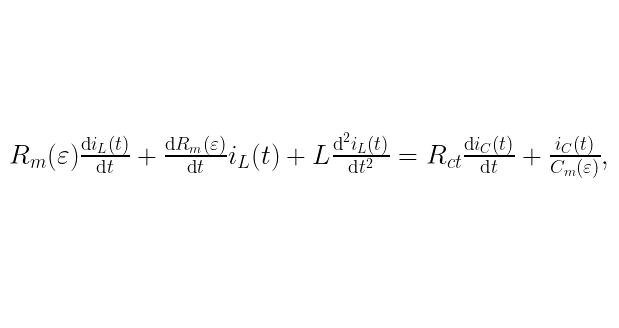

In [8]:
render_and_show(valid_equations[5])

#### - Rendering equations to A4 sized transparent .png files and saving locally:


In [12]:
# Some of the renders might fail
%xmode Plain
saved = 0
for line_nr in tqdm(range(len(valid_equations))):
    location = 'EquationRenders/'
    try:
        filename = f'eq_line_{line_nr}'
        latex_to_image(math_expr=valid_equations[line_nr], file_name=filename, location=location)
        saved += 1
    except Exception as e:
        pass
